<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/levelup.png' width=240/></center>

<center>모델을 빨리 만드는 것이 목적이 아닙니다. 천천히 생각하고 정리하면서 구문을 정성껏 작성하세요.</center>

# 과제: 직원 이직 여부 예측


<img src = "https://github.com/Jangrae/img/blob/master/employee.png?raw=true" width=900 align="left"/>

# 실습 안내

**1) 실습 방법**

- 데이터 전처리와 탐색 보다는 모델 코딩에 중점을 둡니다.
- 기존 소스에서 복사해 붙여넣기 하지 않고 다시 코딩합니다.
- 실습 후 시간이 남으면 데이터 탐색과 성능 튜닝을 진행합니다. 
- 모든 작업에는 주석을 가능한 충분히 답니다.
- 입력을 요구한 **(작성)**, **(의견)** 부분을 충분히 채웁니다.

**2) 실습 내용**

- 대상 데이터를 읽어와 탐색하며 이해합니다.
- 결측치를 확인하고 처리합니다.
- 범주형 변수를 구분하고 가변수화를 진행합니다.
- 연속형 변수를 구분하고 정규화를 진행합니다.
- 데이터를 학습용 데이터와 평가용 데이터로 분리합니다.
- 다양한 머신러닝 알고리즘을 사용해 모델링합니다.
- 데이터 불균형을 해결하고 다시 모델링해 이전 성능과 비교합니다.
- 성능 평가 결과를 이해하고 설명합니다.

**3) 데이터 정보**

- Attrition: 이직여부 (1-Yes 0-No)	
- Age: 나이	
- BusinessTravel: 출장 빈도
- Department: 현재 부서	
- DistanceFromHome: 집과 직장 사이의 거리 (마일)	
- Education: 교육수준 (1-Below College 2-College 3-Bachelor 4- Master 5-Doctor)
- EducationField: 전공	
- EmployeeNumber: 사번	
- EnvironmentSatisfaction: 근무환경에 대한 만족도 (1-Low 2-Good 3-Excellent 4-Outstanding)
- Gender: 성별	
- JobInvolvement: 직무 적극성, 참여도 (1-Low 2-Medium 3-High 4-Very High)
- JobRole: 직무	
- JobSatisfaction: 직무 만족도 (1-Low 2-Medium 3-High 4-Very High)
- MaritalStatus: 결혼상태	
- MonthlyIncome: 월급	
- NumCompaniesWorked: 현재까지 근무한 회사 수	
- OverTime: 야근 여부	
- PercentSalaryHike: 전년대비 급여 인상율 (%)	
- RelationshipSatisfaction: 동료와의 관계 만족도 (1-Low 2-Medium 3-High 4-Very High)
- StockOptionLevel: 스톡옵션 수준 (0 ~ 3)	
- TotalWorkingYears: 총 근무 연수	
- TrainingTimesLastYear: 전년 교육훈련 횟수	
- WorkLifeBalance: 워라밸, 일과 삶의 균형도 (1-Bad 2-Good 3-Better 4-Best)
- YearsAtCompany: 현 직장 근무 연수	
- YearsInCurrentRole: 현 직무 연수	
- YearsWithCurrManager: 현 팀장과 근무한 연수

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [256]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [257]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Attrition_NA.CSV'
path = 'https://bit.ly/AttritionFile'
data = pd.read_csv(path)

# 값 변경: Yes/No --> 1/0
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# 2.데이터 탐색

- 다양한 탐색 및 분석 방법을 사용해 대상 데이터를 충분히 이해합니다.

**1) 상/하위 데이터 확인**

- 데이터 앞/뒤를 살펴 데이터를 간단히 확인합니다.

In [258]:
# 상위 데이터 확인
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0,33,Travel_Rarely,Research & Development,7.0,3,Medical,817,3,Male,...,No,11,4,0,14,3,4,13,9,7
1,0,35,Travel_Frequently,Research & Development,18.0,2,Life Sciences,1412,3,Male,...,No,11,3,0,10,2,3,2,2,2
2,0,42,Travel_Rarely,Research & Development,6.0,3,Medical,1911,3,Male,...,No,13,2,1,18,3,4,13,7,7
3,0,46,Travel_Rarely,Sales,2.0,3,Marketing,1204,3,Female,...,No,23,1,0,28,2,3,26,15,9
4,0,39,Travel_Frequently,Sales,NaN,3,Life Sciences,1812,3,Male,...,No,18,4,1,7,6,3,2,1,2


In [259]:
# 하위 데이터 확인
data.tail()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
1245,0,27,Travel_Rarely,Research & Development,19.0,3,Other,1619,4,Male,...,No,11,1,2,7,3,3,7,7,7
1246,0,29,Travel_Rarely,Research & Development,9.0,3,Life Sciences,1558,3,Male,...,No,18,1,2,5,2,2,1,0,0
1247,0,29,Non-Travel,Sales,2.0,3,Life Sciences,469,4,Male,...,No,14,1,1,4,3,2,4,3,2
1248,0,43,Travel_Rarely,Sales,16.0,3,Marketing,327,4,Female,...,Yes,22,3,1,22,3,3,17,13,9
1249,0,26,Travel_Rarely,Research & Development,NaN,4,Medical,1177,1,Male,...,No,22,2,1,8,2,3,8,7,7


**2) 변수 정보 확인**

- 변수 이름, 값 개수, 데이터 형식등을 확인합니다.

In [260]:
# 열 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1250 non-null   int64  
 1   Age                       1250 non-null   int64  
 2   BusinessTravel            1250 non-null   object 
 3   Department                1250 non-null   object 
 4   DistanceFromHome          1196 non-null   float64
 5   Education                 1250 non-null   int64  
 6   EducationField            1250 non-null   object 
 7   EmployeeNumber            1250 non-null   int64  
 8   EnvironmentSatisfaction   1250 non-null   int64  
 9   Gender                    1250 non-null   object 
 10  JobInvolvement            1250 non-null   int64  
 11  JobRole                   1250 non-null   object 
 12  JobSatisfaction           1250 non-null   int64  
 13  MaritalStatus             1250 non-null   object 
 14  MonthlyI

**3) 기초통계정보 확인**

- 기초통계정보를 통해 숫자 데이터를 갖는 변수들 값 분포를 확인합니다.

In [261]:
# 기초 통계 정보
data.describe()

,Attrition,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
count,1250.000000,1250.000000,1196.000000,1250.000000,1250.00000,1250.000000,1250.0000,1250.000000,1250.000000,1229.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,0.160000,36.931200,9.258361,2.916800,1030.97120,2.739200,2.7272,2.729600,6525.548000,2.678600,15.216000,2.717600,0.796000,11.33920,2.808000,2.761600,7.117600,4.276000,4.166400
std,0.366753,9.122162,8.166016,1.025436,603.40408,1.096971,0.7102,1.110617,4676.979554,2.473647,3.625556,1.074977,0.851213,7.79687,1.277357,0.715245,6.246966,3.660074,3.610476
min,0.000000,18.000000,1.000000,1.000000,1.00000,1.000000,1.0000,1.000000,1009.000000,0.000000,11.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,2.000000,2.000000,496.25000,2.000000,2.0000,2.000000,2932.250000,1.000000,12.000000,2.000000,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,2.000000
50%,0.000000,36.000000,7.000000,3.000000,1028.00000,3.000000,3.0000,3.000000,4988.000000,2.000000,14.000000,3.000000,1.000000,10.00000,3.000000,3.000000,5.000000,3.000000,3.000000
75%,0.000000,43.000000,14.000000,4.000000,1567.00000,4.000000,3.0000,4.000000,8437.500000,4.000000,18.000000,4.000000,1.000000,15.00000,3.000000,3.000000,10.000000,7.000000,7.000000
max,1.000000,60.000000,29.000000,5.000000,2068.00000,4.000000,4.0000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.00000,6.000000,4.000000,40.000000,18.000000,17.000000


**4) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [262]:
# 결측치 확인
data.isnull().sum()

Attrition                    0
Age                          0
BusinessTravel               0
Department                   0
DistanceFromHome            54
Education                    0
EducationField               0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
JobInvolvement               0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsWithCurrManager         0
dtype: int64

**5) Attrition 변수 분포 확인**

- Target 변수인 Attrition 값 분포를 확인합니다.

In [263]:
# 번주값과 그 값의 개수 확인
data['Attrition'].value_counts()

0    1050
1     200
Name: Attrition, dtype: int64

**참고**

- 0과 1의 분포가 너무 차이가 나며, 이러한 데이터를 불균형 데이터라고 부릅니다.
- 우선 불균형 데이터로 모델링을 진행합니다.

**6) 주요 변수 확인**

6-1) Attrition 변수 값 분포를 막대그래프로 시각화해 확인합니다.

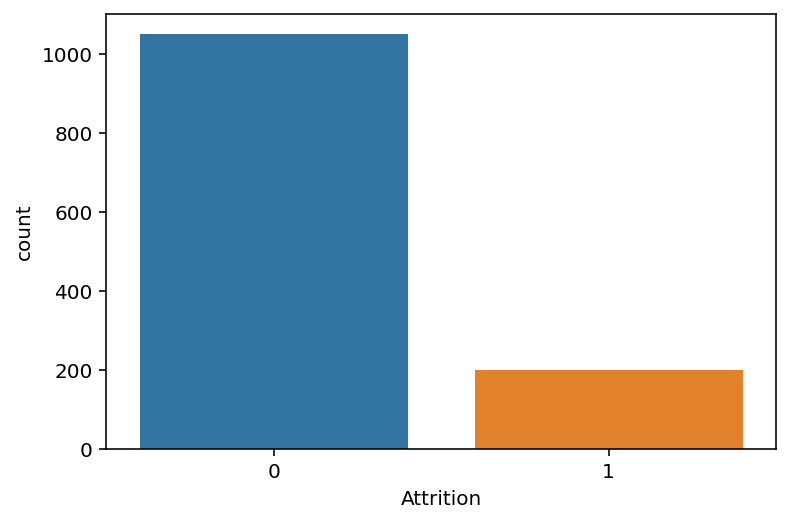

In [264]:
# Attrition 값 분포
sns.countplot(data['Attrition'])
plt.show()

- (의견) 이직 가능성을 예측할 때 정밀도나 민감도가 문제가 될 것 같다.
- (의견) 대부분이 이직 의사가 없는 것을 보면 이직하는 사람들은 공통적으로 이직 의사에 강한 영향을 주는 무언가가 있는 것 같다.

6-2) Attrition 값으로 구분해 Age 변수 값 분포를 히스토그램으로 시각화해 확인합니다.

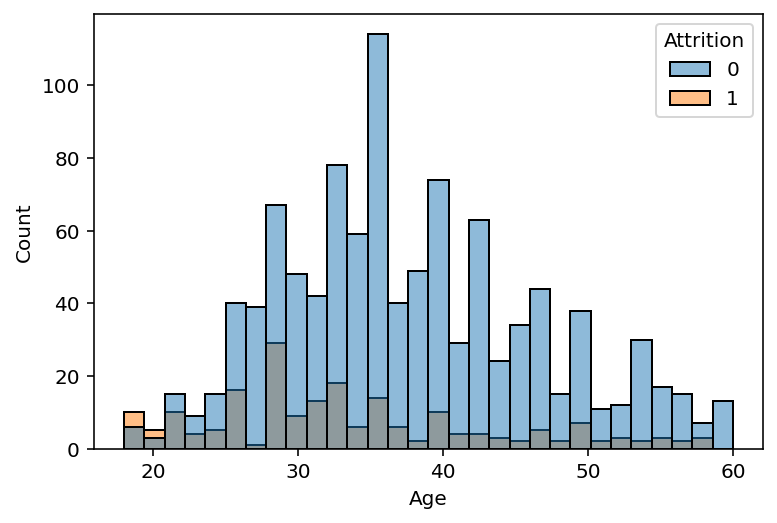

In [265]:
# Age --> Attrition 값 분포
sns.histplot(x=data['Age'], hue=data['Attrition'], bins=30)
plt.show()

- (의견) 20대~30대가 현재 직무에 만족하지 못하고 이직을 결심하는 게 아닐까?
- (의견) 40대 초반과 50대 초반에 이직자 수가 조금씩 튀어나온 걸 보면 연령별, 직급별로 제약이 있는 것 같기도 하다(승진 못하면 이직)

6-3) Attrition 값으로 구분해 YearsAtCompany 변수 값 분포를 히스토그램으로 시각화해 확인합니다.

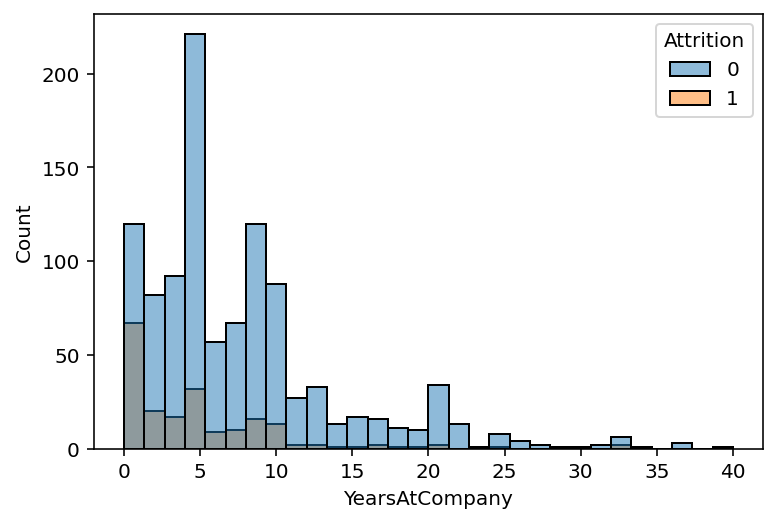

In [266]:
# YearsAtCompany --> Attrition 값 분포
sns.histplot(x=data['YearsAtCompany'],hue=data['Attrition'], bins=30)
plt.show()

- (의견) 회사에 신규로 유입된 인원들이 회사생활에 적응하지 못하고 이직을 결심하는 것 같다.
- (의견) 온보딩 프로세스 정비와 신입에 대한 직장 문화 개선 등이 필요할 것 같다.

6-4) 추가로 확인할 변수가 있으면 더 확인합니다.

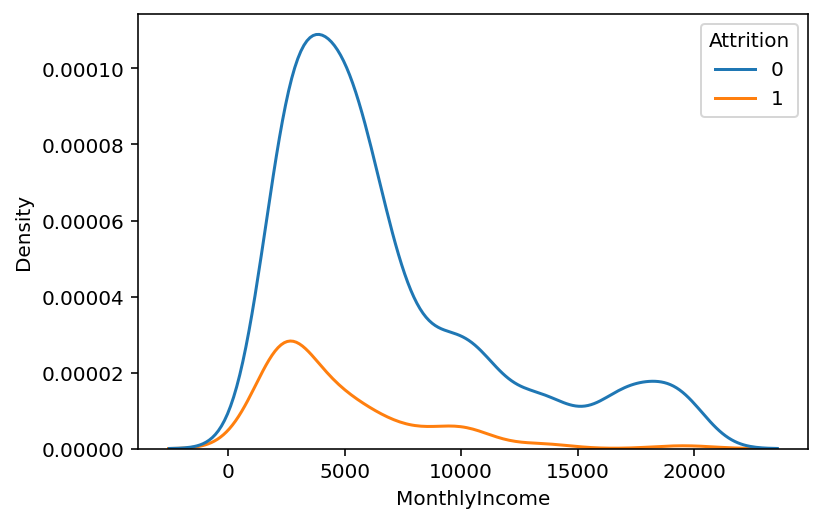

In [267]:
# 추가 - 월급대 별 이직 여부
sns.kdeplot(data=data, x='MonthlyIncome', hue='Attrition')
plt.show()

* (의견) 이직하는 사람들은 월급에 불만을 가졌을 가능성이 높아 보인다.
* (의견) 월급을 더 주거나, 그럴 수 없다면 그에 상응하는 무언가를 주는 것이 좋아 보인다.

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 결측치 처리**

- 다음 두 변수의 결측치는 두 변수의 가장 빈번한 값으로 변경합니다.
    - DistanceFromHome, NumCompaniesWorked
- value_counts().idxmax()를 사용해 가장 빈도가 높은 변수 값을 얻을 수 있습니다.

In [268]:
# 결측치 처리
fre_DistanceFromHome = data['DistanceFromHome'].value_counts().idxmax()
fre_NumCompaniesWorked = data['NumCompaniesWorked'].value_counts().idxmax()
data['DistanceFromHome'].fillna(fre_DistanceFromHome, inplace=True)
data['NumCompaniesWorked'].fillna(fre_NumCompaniesWorked, inplace=True)

# 확인
data.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsWithCurrManager        0
dtype: int64

**2) x, y 분리**

- Attrition 변수가 Target입니다.
- x, y가 분리된 이후부터 y는 절대로 건드지지 않아야 합니다.

In [269]:
# target 확인
target = 'Attrition'

# 데이터 분리

x = data.drop(target, axis=1)
y = data[target]

**3) 가변수화**

- 왜 x의 다음 변수들이 가변수화 대상이 되는지 파악한 후 가변수화를 진행합니다.
    - BusinessTravel, Department, Education, EducationField, EnvironmentSatisfaction, Gender
    - JobInvolvement, JobRole, JobSatisfaction, MaritalStatus, OverTime, RelationshipSatisfaction
    - StockOptionLevel, WorkLifeBalance

In [270]:
# 가변수화
cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 
        'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 
        'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
x = pd.get_dummies(x, columns=cols)

# 확인
x

,Age,DistanceFromHome,EmployeeNumber,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,33,7.0,817,11691,0.0,11,14,3,13,9,...,0,1,1,0,0,0,0,0,0,1
1,35,18.0,1412,9362,2.0,11,10,2,2,2,...,1,0,1,0,0,0,0,0,1,0
2,42,6.0,1911,13348,9.0,13,18,3,13,7,...,0,0,0,1,0,0,0,0,0,1
3,46,2.0,1204,17048,8.0,23,28,2,26,15,...,0,0,1,0,0,0,0,0,1,0
4,39,2.0,1812,4127,2.0,18,7,6,2,1,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,27,19.0,1619,4066,1.0,11,7,3,7,7,...,0,0,0,0,1,0,0,0,1,0
1246,29,9.0,1558,2451,6.0,18,5,2,1,0,...,0,0,0,0,1,0,0,1,0,0
1247,29,2.0,469,4649,1.0,14,4,3,4,3,...,0,0,0,1,0,0,0,1,0,0
1248,43,16.0,327,16064,5.0,22,22,3,17,13,...,1,0,0,1,0,0,0,0,1,0


**4) 정규화**

- x의 다음 변수들을 정규화 합니다.
    - Age, DistanceFromHome, EmployeeNumber, MonthlyIncome,NumCompaniesWorked 
    - PercentSalaryHike, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany 
    - YearsInCurrentRole, YearsWithCurrManager

In [271]:
# 정규화
cols=['Age', 'DistanceFromHome', 'EmployeeNumber', 'MonthlyIncome', 'NumCompaniesWorked', 
      'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
      'YearsInCurrentRole', 'YearsWithCurrManager']

x[cols] = (x[cols] - x[cols].min()) / (x[cols].max() - x[cols].min())
# 확인
x

,Age,DistanceFromHome,EmployeeNumber,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.357143,0.214286,0.394775,0.562507,0.000000,0.000000,0.350,0.500000,0.325,0.500000,...,0,1,1,0,0,0,0,0,0,1
1,0.404762,0.607143,0.682632,0.439863,0.222222,0.000000,0.250,0.333333,0.050,0.111111,...,1,0,1,0,0,0,0,0,1,0
2,0.571429,0.178571,0.924045,0.649763,1.000000,0.142857,0.450,0.500000,0.325,0.388889,...,0,0,0,1,0,0,0,0,0,1
3,0.666667,0.035714,0.582003,0.844602,0.888889,0.857143,0.700,0.333333,0.650,0.833333,...,0,0,1,0,0,0,0,0,1,0
4,0.500000,0.035714,0.876149,0.164192,0.222222,0.500000,0.175,1.000000,0.050,0.055556,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,0.214286,0.642857,0.782777,0.160979,0.111111,0.000000,0.175,0.500000,0.175,0.388889,...,0,0,0,0,1,0,0,0,1,0
1246,0.261905,0.285714,0.753266,0.075935,0.666667,0.500000,0.125,0.333333,0.025,0.000000,...,0,0,0,0,1,0,0,1,0,0
1247,0.261905,0.035714,0.226415,0.191680,0.111111,0.214286,0.100,0.500000,0.100,0.166667,...,0,0,0,1,0,0,0,1,0,0
1248,0.595238,0.535714,0.157716,0.792786,0.555556,0.785714,0.550,0.500000,0.425,0.722222,...,1,0,0,1,0,0,0,0,1,0


**5) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 7:3으로 분리합니다.
- random_state 옵션 값은 2022를 지정합니다.

In [272]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링 1차

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 다양한 알고리즘으로 모델을 만들고 각각의 성능을 확인합니다.
- 성능 평가는 confusion_matrix, classification_report를 사용합니다.
- 각 알고리즘별로 요구되는 내용을 숙지하면서 모델링을 진행합니다.

## 4.1.KNN

### 4.1.1.모델링
- KNN 알고리즘으로 모델링하고 성능을 확인합니다.

In [273]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier


In [274]:
# 2단계: 선언하기
model = KNeighborsClassifier(n_neighbors=5)

In [275]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [276]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [277]:
# 5단계: 평가하기
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))
print('-'*80)
print(classification_report(y_test,y_pred))

0.8453333333333334
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       315
           1       0.55      0.18      0.27        60

    accuracy                           0.85       375
   macro avg       0.71      0.58      0.59       375
weighted avg       0.81      0.85      0.81       375



### 4.1.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [278]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

score={}
score['KNN'] = [precision_score(y_test, y_pred),
                recall_score(y_test, y_pred),
                accuracy_score(y_test, y_pred)]

## 4.2.Logistic Regression

### 4.2.1.모델링

- Logistic Regression 알고리즘으로 모델링하고 성능을 확인합니다.

In [279]:
# 1단계: 불러오기
from sklearn.linear_model import LogisticRegression


In [280]:
# 2단계: 선언하기
model = LogisticRegression()

In [281]:
# 3단계: 학습하기
model.fit(x_train,y_train)

LogisticRegression()

In [282]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [283]:
# 5단계: 평가하기
print(accuracy_score(y_test,y_pred))
print('-'*80)
print(classification_report(y_test,y_pred))

0.8853333333333333
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       315
           1       0.81      0.37      0.51        60

    accuracy                           0.89       375
   macro avg       0.85      0.68      0.72       375
weighted avg       0.88      0.89      0.87       375



### 4.2.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [284]:
score['Logistic Reg'] = [precision_score(y_test, y_pred),
                         recall_score(y_test, y_pred),
                         accuracy_score(y_test, y_pred)]

## 4.3.Random Forest

### 4.3.1.모델링

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [285]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestClassifier


In [286]:
# 2단계: 선언하기
model = RandomForestClassifier(random_state=2022)

In [287]:
# 3단계: 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(random_state=2022)

In [288]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [289]:
# 5단계: 평가하기
print(accuracy_score(y_test,y_pred))
print('-'*80)
print(classification_report(y_test,y_pred))

0.8533333333333334
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       315
           1       0.86      0.10      0.18        60

    accuracy                           0.85       375
   macro avg       0.86      0.55      0.55       375
weighted avg       0.85      0.85      0.80       375



### 4.3.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [290]:
score['Random Forest'] = [precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          accuracy_score(y_test, y_pred)]

## 4.4.XGBoost

### 4.4.1.모델링

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022를 지정합니다.

In [291]:
# 1단계: 불러오기
from xgboost import XGBClassifier


In [292]:
# 2단계: 선언하기
model = XGBClassifier(random_state=2022)

In [293]:
# 3단계: 학습하기
model.fit(x_train, y_train)

[12:15:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [294]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [295]:
# 5단계: 평가하기
print(accuracy_score(y_test,y_pred))
print('-'*80)
print(classification_report(y_test,y_pred))

0.88
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       315
           1       0.73      0.40      0.52        60

    accuracy                           0.88       375
   macro avg       0.81      0.69      0.72       375
weighted avg       0.87      0.88      0.87       375



### 4.4.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [296]:
score['XGBoost'] = [precision_score(y_test, y_pred),
                    recall_score(y_test, y_pred),
                    accuracy_score(y_test, y_pred)]

# 5.정리 #1

- 모델 성능에서 특이한 점을 발견했나요?
- accuracy, precision이 높은 이유는 무엇일까요?
- recall이 낮는 이유는 무엇일까요?

In [297]:
# 중간 결과 조회
score

{'KNN': [0.55, 0.18333333333333332, 0.8453333333333334],
 'Logistic Reg': [0.8148148148148148, 0.36666666666666664, 0.8853333333333333],
 'Random Forest': [0.8571428571428571, 0.1, 0.8533333333333334],
 'XGBoost': [0.7272727272727273, 0.4, 0.88]}

### 중간정리 의견

* KNN이 정밀도가 유독 낮게 나왔다.
* 모든 모델이 정확도가 80% 이상이긴 하지만 정밀도와 재현도는 모두 낮았다.
* 실제 이직 의사가 있는 사람을 없는 사람이라고 착각할 가능성이 높다.
* 정확도, 정밀도가 높은 이유는 총 표본 숫자가 충분하고, 이직을 희망하는 직원과 그렇지 않은 직원과의 차이가 명확하기 때문이다(월급, 연령 등).

* 민감도가 낮은 이유는 이직한다고 응답한 사람이 그렇지 않다고 응답한 사람보다 훨씬 적기 때문이다.

# 6. Over/Under Sampling

- 불균형 데이터(Imbalanced Data)를 맞추기 위해 Over 또는 Under Sampling을 수행할 수 있습니다.
- imblearn 라이브러리를 사용합니다.

In [298]:
# imbalanced-learn 라이브러리 설치
!pip install imblearn

- 원래 Target 값 분포를 우선 확인합니다.

In [299]:
# Target 값 분포 확인
y.value_counts()

0    1050
1     200
Name: Attrition, dtype: int64

- 본 실습에서는 Over Sampling으로 작업합니다.

In [300]:
# Over Sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2022)
x_over, y_over = smote.fit_resample(x, y)

In [249]:
# Over Sampling(훈련 데이터만)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2022)
x_over, y_over = smote.fit_resample(x_train, y_train)

- Over Sampling 된 y_over 분포를 확인하면 0과 1 값의 비율이 같음을 알 수 있습니다.

In [301]:
# Target 값 분포 확인
y_over.value_counts()

0    1050
1    1050
Name: Attrition, dtype: int64

- 참고: Under Sampling 방법은 아래와 같으며, 본 실습에서 사용하지 않으니 주석처리합니다.

In [ ]:
# Under Sampling
# from imblearn.under_sampling import ClusterCentroids

# cc = ClusterCentroids(random_state=2022)
# x_under, y_under = cc.fit_resample(x, y)

- 새로 Sampling 된 데이터(x_over, y_over)로 학습용, 평가용 데이터를 7:3으로 분리합니다.
- random_state 옵션 값은 2022를 지정합니다.

In [302]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=2022)  # 모듈 불러오기

In [250]:
# 모듈 불러오기(훈련 데이터만)
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=2022)  

# 7.모델링 #2

- 위에서 만든 모델을 그때와 동일한 옵션으로 다시 모델링합니다.

## 7.1.KNN

- KNN 알고리즘으로 모델링하고 성능을 확인합니다.

In [303]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier


In [304]:
# 2단계: 선언하기
model = KNeighborsClassifier(n_neighbors=5)

In [305]:
# 3단계: 학습하기
model.fit(x_train,y_train)

KNeighborsClassifier()

In [306]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [307]:
# 5단계: 평가하기
print(accuracy_score(y_test,y_pred))
print('-'*80)
print(classification_report(y_test,y_pred))

0.846031746031746
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.69      0.81       305
           1       0.77      0.99      0.87       325

    accuracy                           0.85       630
   macro avg       0.88      0.84      0.84       630
weighted avg       0.88      0.85      0.84       630



### 7.1.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [57]:
score['KNN_2'] = [precision_score(y_test, y_pred),
                  recall_score(y_test, y_pred),
                  accuracy_score(y_test, y_pred)]

## 7.2.Logistic Regression

- Logistic Regression 알고리즘으로 모델링하고 성능을 확인합니다.

In [58]:
# 1단계: 불러오기
from sklearn.linear_model import LogisticRegression


In [60]:
# 2단계: 선언하기
model = LogisticRegression()

In [61]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LogisticRegression()

In [62]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [63]:
# 5단계: 평가하기
print(accuracy_score(y_test,y_pred))
print('-'*80)
print(classification_report(y_test,y_pred))

0.9158730158730158
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       305
           1       0.98      0.85      0.91       325

    accuracy                           0.92       630
   macro avg       0.92      0.92      0.92       630
weighted avg       0.92      0.92      0.92       630



### 7.2.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [64]:
score['Logistic Reg_2'] = [precision_score(y_test, y_pred),
                           recall_score(y_test, y_pred),
                           accuracy_score(y_test, y_pred)]

## 7.3.Random Forest

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [65]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestClassifier


In [66]:
# 2단계: 선언하기
model = RandomForestClassifier(random_state=2022)

In [67]:
# 3단계: 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(random_state=2022)

In [69]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [70]:
# 5단계: 평가하기
print(accuracy_score(y_test,y_pred))
print('-'*80)
print(classification_report(y_test,y_pred))

0.9285714285714286
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       305
           1       0.95      0.91      0.93       325

    accuracy                           0.93       630
   macro avg       0.93      0.93      0.93       630
weighted avg       0.93      0.93      0.93       630



### 7.3.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [71]:
score['Random Forest_2'] = [precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred),
                            accuracy_score(y_test, y_pred)]

## 7.4.XGBoost

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022를 지정합니다.

In [72]:
# 1단계: 불러오기
from xgboost import XGBClassifier


In [73]:
# 2단계: 선언하기
model = XGBClassifier(random_state=2022)

In [74]:
# 3단계: 학습하기
model.fit(x_train, y_train)

[10:29:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [76]:
# 5단계: 평가하기
print(accuracy_score(y_test,y_pred))
print('-'*80)
print(classification_report(y_test,y_pred))

0.926984126984127
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       305
           1       0.96      0.90      0.93       325

    accuracy                           0.93       630
   macro avg       0.93      0.93      0.93       630
weighted avg       0.93      0.93      0.93       630



### 7.4.2.성능 정보 수집

- 아래 구문을 수행하여 이후 비교할 성능 정보를 저장합니다.

In [77]:
score['XGBoost_2'] = [precision_score(y_test, y_pred),
                      recall_score(y_test, y_pred),
                      accuracy_score(y_test, y_pred)]

## 추가 : 훈련 데이터만 사용한 거로 KNN 예측

In [251]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.65      0.78       211
           1       0.76      0.98      0.85       230

    accuracy                           0.83       441
   macro avg       0.86      0.82      0.82       441
weighted avg       0.86      0.83      0.82       441



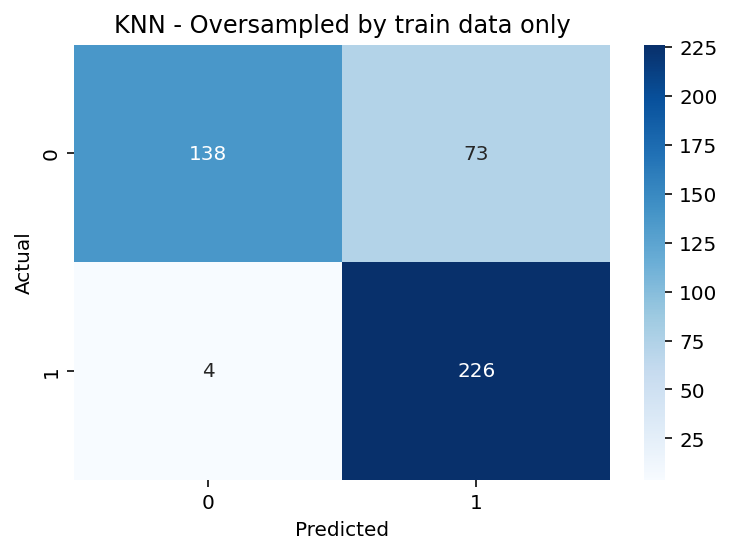

In [252]:
# 시각화
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='g', cmap='Blues')
plt.title('KNN - Oversampled by train data only')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 8.정리 #2

## 8.1.성능 비교

- Over Sampling 전후 성능을 비교합니다.

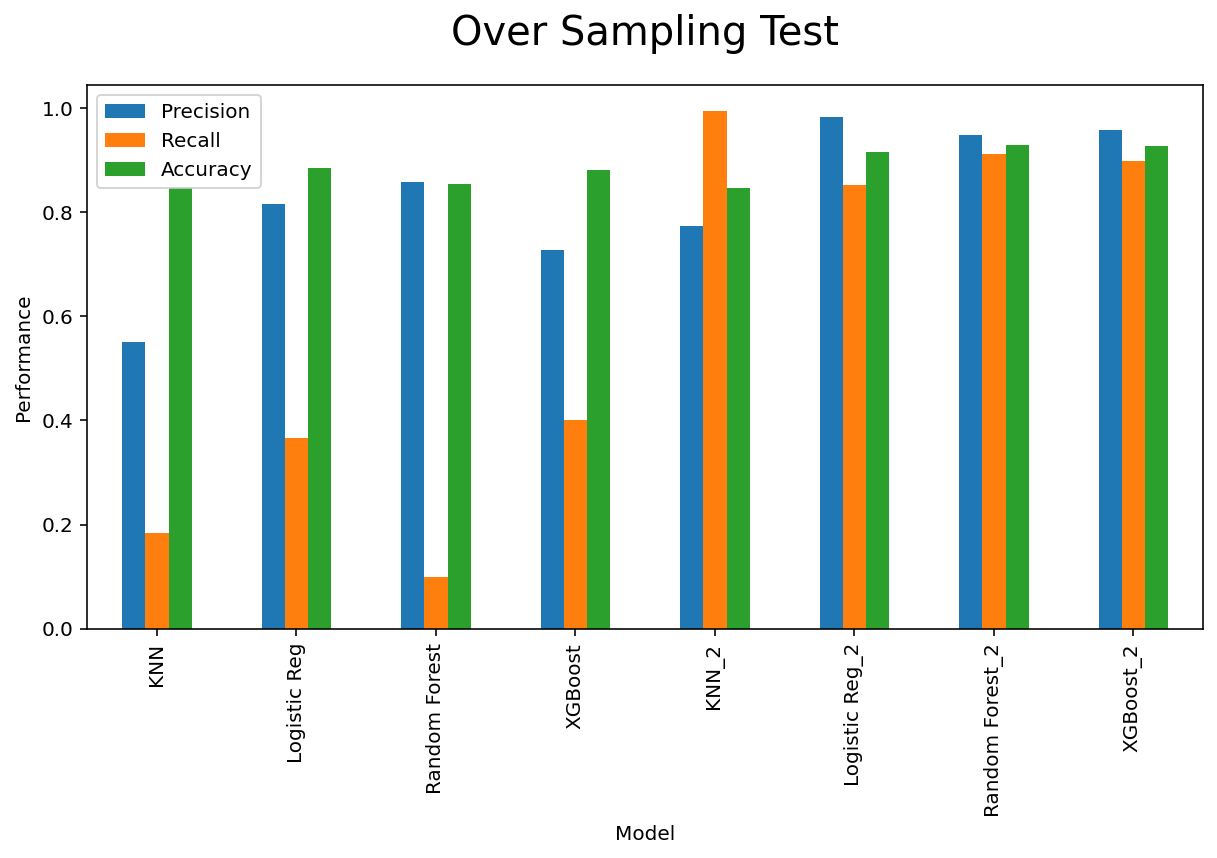

In [78]:
# 성능 비교
tmp = pd.DataFrame.from_dict(score, orient='index', columns=['Precision', 'Recall', 'Accuracy'])
tmp.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Over Sampling Test', size=20, pad=20)
plt.xlabel('Model')
plt.ylabel('Performance')
plt.show()

## 8.2.정리

- 불균형 데이터에 대해 이해 했나요?
- Over Sampling, Under Sampling 개념을 이해 했나요?
- Over Sampling 또는 Under Sampling 수행 후 모델의 성능이 달라졌나요?
- 모델의 성능을 높이기 위해 어떤 것들을 할 수 있을까요?

### 정리 의견

* 데이터 크기(양) 차이가 심하니까 모델이 정확히 예측하지 못한 것 같다.
* 오버샘플링은 상대적으로 표본이 부족한 데이터의 사이즈를 늘리고, 언더샘플링은 표본이 지나치게 많은 데이터의 사이즈를 줄이는 것이다.
* 정확도가 약간 개선되었고, 정밀도와 민감도가 크게 상승했다.
* 오버피팅한 데이터를 기반으로 한 모델에 랜덤서치나 그리드서치를 실행하면 더 좋을 것 같다.

# 부록 : 오버샘플링 모델 최적화

In [203]:
# 라이브러리 불러오기
from sklearn.model_selection import RandomizedSearchCV
# 변수 정의
rd_model = KNeighborsClassifier()
rd_params = {'n_neighbors':range(3,31)}
# 모델 정의
model = RandomizedSearchCV(rd_model, rd_params, cv=10, scoring='accuracy', n_iter=50)
# 모델 학습
model.fit(x_train,y_train)
# 모델 예측 및 평가
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print('-'*70)
print(classification_report(y_test,y_pred))

0.9095238095238095
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       305
           1       0.86      0.99      0.92       325

    accuracy                           0.91       630
   macro avg       0.92      0.91      0.91       630
weighted avg       0.92      0.91      0.91       630



In [90]:
# 최적의 파라미터 출력
print(model.best_estimator_)
print(model.best_params_)

KNeighborsClassifier(n_neighbors=4)
{'n_neighbors': 4}


In [88]:
# 성능 정보 수집(부록)
score['KNN UP'] = [precision_score(y_test, y_pred),    # KNN UP은 KNN이 아닌 KNN_2 모델에 랜덤서치 돌린 것
                      recall_score(y_test, y_pred),
                      accuracy_score(y_test, y_pred)]

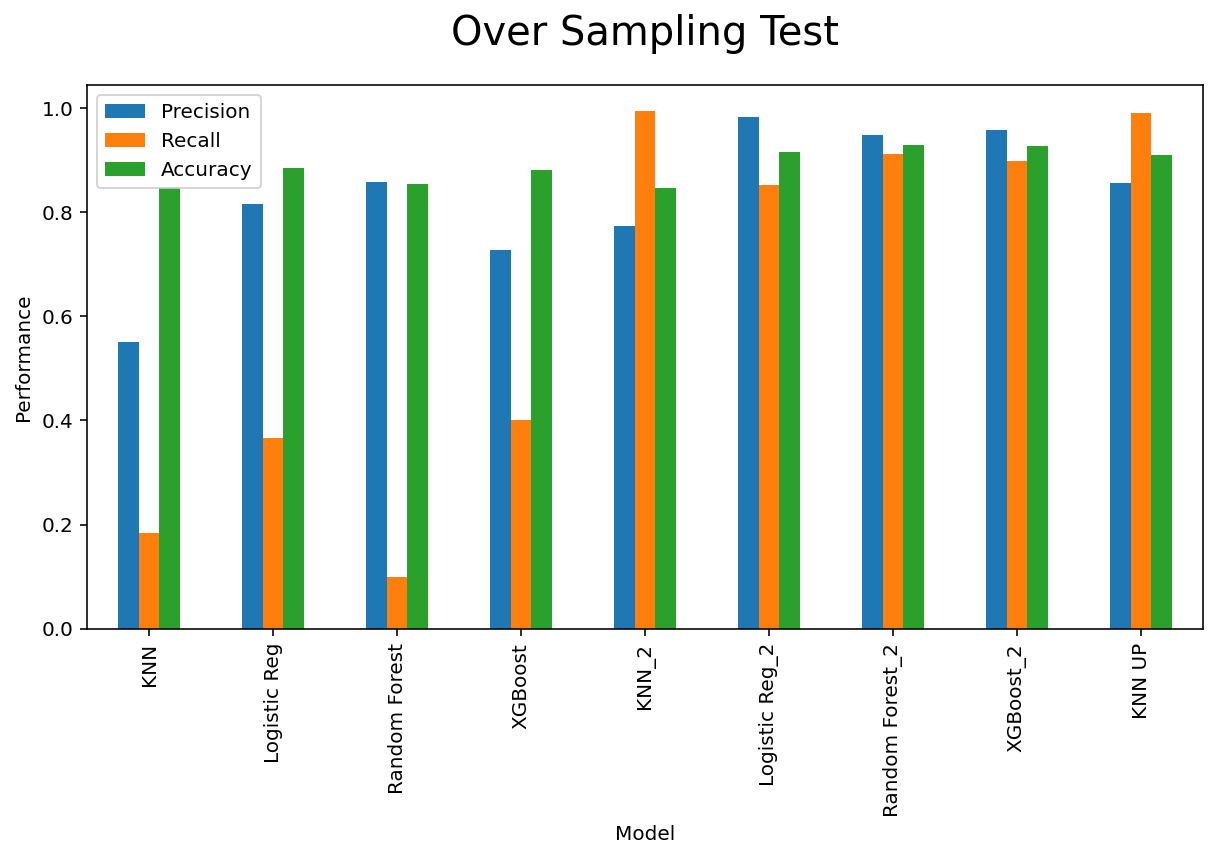

In [89]:
# 성능 비교 시각화
tmp = pd.DataFrame.from_dict(score, orient='index', columns=['Precision', 'Recall', 'Accuracy'])
tmp.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Over Sampling Test', size=20, pad=20)
plt.xlabel('Model')
plt.ylabel('Performance')
plt.show()

## 추가 : 오버샘플링 모델 최적화(훈련 데이터만 정제한 버전)

In [253]:
# 라이브러리 불러오기
from sklearn.model_selection import RandomizedSearchCV
# 변수 정의
rd_model = KNeighborsClassifier()
rd_params = {'n_neighbors':range(3,31)}
# 모델 정의
model = RandomizedSearchCV(rd_model, rd_params, cv=10, scoring='accuracy', n_iter=50)
# 모델 학습
model.fit(x_train,y_train)
# 모델 예측 및 평가
y_pred = model.predict(x_test)
print('accuracy :',accuracy_score(y_test,y_pred))
print('-'*60)
print(classification_report(y_test,y_pred))

accuracy : 0.8662131519274376
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.74      0.84       211
           1       0.81      0.98      0.88       230

    accuracy                           0.87       441
   macro avg       0.89      0.86      0.86       441
weighted avg       0.88      0.87      0.86       441



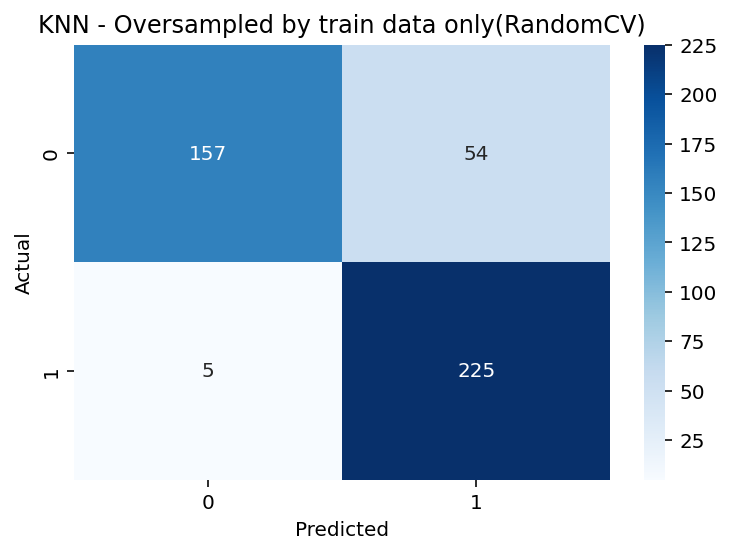

In [254]:
# confusionmatrix 시각화
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='g', cmap='Blues')
plt.title('KNN - Oversampled by train data only(RandomCV)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

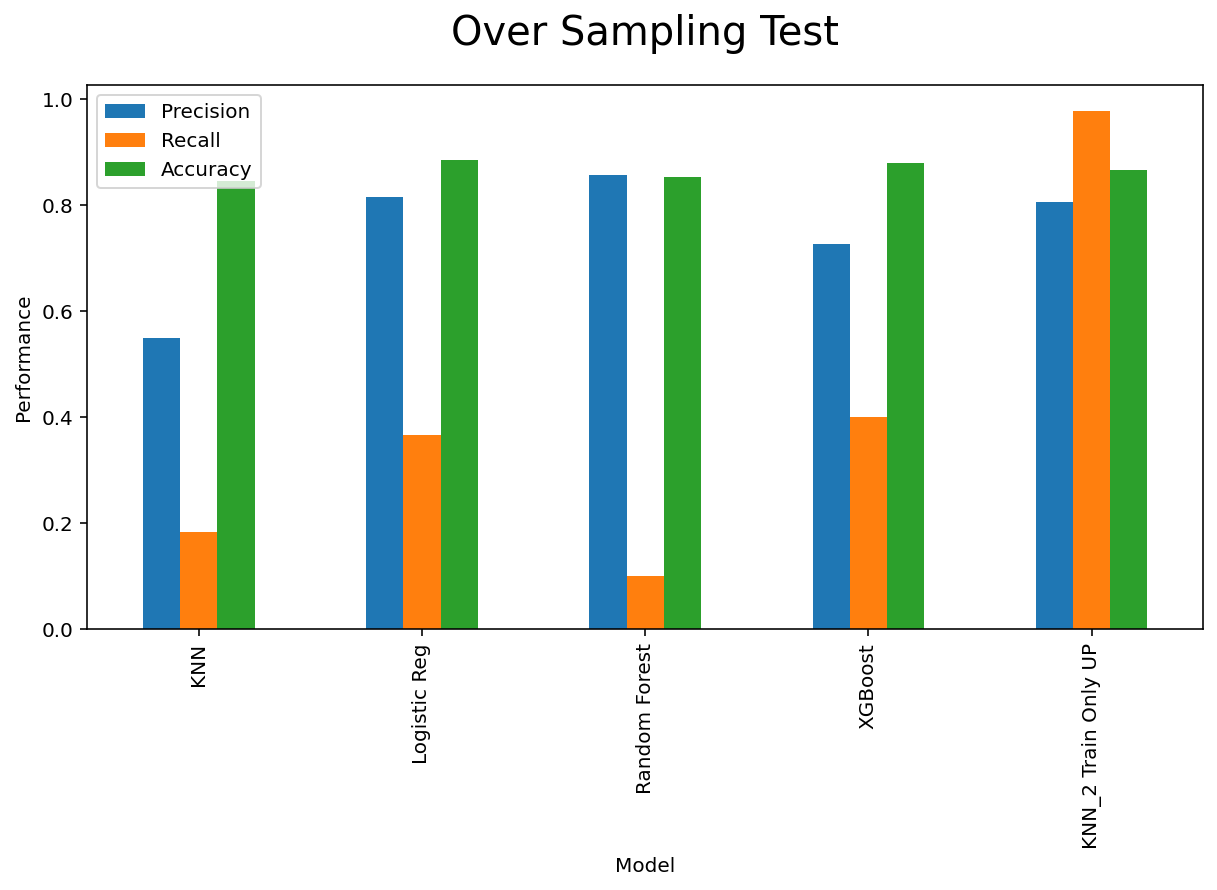

In [255]:
# 목록 추가 및 시각화
# 성능 정보 수집(부록)
score['KNN_2 Train Only UP'] = [precision_score(y_test, y_pred),    # KNN UP은 KNN이 아닌 KNN_2 모델에 랜덤서치 돌린 것
                                recall_score(y_test, y_pred),
                                accuracy_score(y_test, y_pred)]

tmp = pd.DataFrame.from_dict(score, orient='index', columns=['Precision', 'Recall', 'Accuracy'])
tmp.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Over Sampling Test', size=20, pad=20)
plt.xlabel('Model')
plt.ylabel('Performance')
plt.show()

In [97]:
# 최적의 파라미터 출력
print(model.best_estimator_)
print(model.best_params_)

KNeighborsClassifier(n_neighbors=4)
{'n_neighbors': 4}


## 부록 요약

* KNN의 경우 랜덤서치를 돌렸을 때 정확도는 변화가 없었지만 정밀도와 재현도에서 큰 성능 상승이 있었다.
* 다만 민감도가 0.99가 나온 부분은 전적으로 신뢰하기보다는 실전에 적용할 때 예의주시할 필요가 있다.

* 추가 : 민감도는 튜닝 이전에도 0.99임, 튜닝 결과 특이도가 상승한 것